# Importing libraries and datasets

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
df1 =pd.read_excel('/content/Nanyang_pte_Bedok.xlsx')
df2 =pd.read_excel('/content/Nanyang_pte_Jurong.xlsx')
df3 =pd.read_excel('/content/Nanyang_pte_Malaysia.xlsx')
df4 =pd.read_excel('/content/Nanyang_pte_USA.xlsx')

In [263]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            364 non-null    object        
 1   Member_Name     364 non-null    object        
 2   Birthdate       364 non-null    datetime64[ns]
 3   Cred Card User  364 non-null    int64         
 4   Purchases       364 non-null    int64         
 5   Amount Spent    364 non-null    int64         
 6   Year Joined     364 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 20.0+ KB


,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined
0,S9648157T,Nicholas Armstrong,1996-08-17,0,6,3120,1996
1,S8414292J,Alice Marsh,1984-11-22,0,1,430,1985
2,S9134073M,Jason Castro,1991-08-14,0,2,1080,1992
3,S9249303K,Tanya Reeves,1992-11-15,0,4,2090,1993
4,S9485975U,Heidi Hodges,1994-03-21,0,4,2130,1995


In [264]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            387 non-null    object        
 1   Member_Name     387 non-null    object        
 2   Birthdate       387 non-null    datetime64[ns]
 3   Cred Card User  387 non-null    int64         
 4   Purchases       387 non-null    int64         
 5   Amount Spent    387 non-null    int64         
 6   Year Joined     387 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 21.3+ KB


,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined
0,S8139863E,Casey Clark,1981-06-26,0,4,2010,1981
1,S8773725F,Georgia Cohen,1987-05-24,0,4,1840,1987
2,S9424032P,Catherine Hughes,1994-03-15,0,4,2090,1994
3,S9871877T,Chester Estrada,1998-08-17,0,4,2020,1998
4,S8426528E,Wilfred Roberson,1984-04-08,0,2,1130,1985


In [265]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            348 non-null    object        
 1   Given Name      348 non-null    object        
 2   Family Name     348 non-null    object        
 3   Birthdate       348 non-null    datetime64[ns]
 4   Cred Card User  348 non-null    object        
 5   Purchases       348 non-null    int64         
 6   Amount Spent    348 non-null    int64         
 7   Year Joined     348 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 21.9+ KB


,NRIC,Given Name,Family Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined
0,S9880670H,Marie,Cox,1998-05-25,0,18,23481,1918
1,S9844148D,Wilfred,Mack,1998-05-15,0,1,530,1920
2,S8290078K,Ted,Young,1982-11-09,1,8,3840,1982
3,S9168981H,Colleen,Reeves,1991-09-16,1,9999,9999,1991
4,S9955937D,Georgia,Brown,1999-11-19,1,4,1920,1999


In [266]:
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            407 non-null    object        
 1   First Name      407 non-null    object        
 2   Last Name       407 non-null    object        
 3   Birthdate       407 non-null    datetime64[ns]
 4   Cred Card User  407 non-null    object        
 5   Purchases       407 non-null    int64         
 6   Amount Spent    407 non-null    int64         
 7   Year Joined     407 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 25.6+ KB


,NRIC,First Name,Last Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined
0,S9634931P,Gerald,Ingram,1996-10-14,No,4,1870,1996
1,S8489467J,Todd,Curtis,1984-11-17,Yes,2,1000,1985
2,S8461559K,Felicia,Watkins,1984-01-06,No,3,1500,1985
3,S8565425T,Muriel,Robinson,1985-07-20,No,5,2410,1986
4,S8784312G,Jon,Greer,1987-10-14,No,1,580,1988


# Standardising data across all datasets to prepare for merging

1. Joining given names and family names, and first names and last names into member name
2. Standardising the values in 'Cred Card User' column
3. Appending 'Region' into each dataset

## Standardising names

In [267]:
df3['Member_Name'] = df3['Given Name'] + ' ' + df3['Family Name']
df3.drop(['Given Name','Family Name'], axis=1, inplace=True)
df3.head()

,NRIC,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Member_Name
0,S9880670H,1998-05-25,0,18,23481,1918,Marie Cox
1,S9844148D,1998-05-15,0,1,530,1920,Wilfred Mack
2,S8290078K,1982-11-09,1,8,3840,1982,Ted Young
3,S9168981H,1991-09-16,1,9999,9999,1991,Colleen Reeves
4,S9955937D,1999-11-19,1,4,1920,1999,Georgia Brown


In [268]:
df4['Member_Name'] = df4['First Name'] + ' ' + df4['Last Name']
df4.drop(['First Name','Last Name'], axis=1, inplace=True)
df4.head()

,NRIC,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Member_Name
0,S9634931P,1996-10-14,No,4,1870,1996,Gerald Ingram
1,S8489467J,1984-11-17,Yes,2,1000,1985,Todd Curtis
2,S8461559K,1984-01-06,No,3,1500,1985,Felicia Watkins
3,S8565425T,1985-07-20,No,5,2410,1986,Muriel Robinson
4,S8784312G,1987-10-14,No,1,580,1988,Jon Greer


## Standardising values in 'Cred Card User' column

In [269]:
df4['Cred Card User'] =df4['Cred Card User'].replace({'Yes':1, 'No':0})
df4.head()

/tmp/ipython-input-1785181208.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['Cred Card User'] =df4['Cred Card User'].replace({'Yes':1, 'No':0})


,NRIC,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Member_Name
0,S9634931P,1996-10-14,0,4,1870,1996,Gerald Ingram
1,S8489467J,1984-11-17,1,2,1000,1985,Todd Curtis
2,S8461559K,1984-01-06,0,3,1500,1985,Felicia Watkins
3,S8565425T,1985-07-20,0,5,2410,1986,Muriel Robinson
4,S8784312G,1987-10-14,0,1,580,1988,Jon Greer


## Appending 'Region' into each dataset

In [270]:
df1['Region']='Bedok'
df2['Region']='Jurong'
df3['Region']='Malaysia'
df4['Region']='USA'
df4.head()

,NRIC,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Member_Name,Region
0,S9634931P,1996-10-14,0,4,1870,1996,Gerald Ingram,USA
1,S8489467J,1984-11-17,1,2,1000,1985,Todd Curtis,USA
2,S8461559K,1984-01-06,0,3,1500,1985,Felicia Watkins,USA
3,S8565425T,1985-07-20,0,5,2410,1986,Muriel Robinson,USA
4,S8784312G,1987-10-14,0,1,580,1988,Jon Greer,USA


# Merging datasets

In [271]:
df = pd.concat([df1,df2,df3,df4]).reset_index(drop=True)
print(len(df1)+len(df2)+len(df3)+len(df4))
print(len(df))
df.head()

1506
1506


,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
0,S9648157T,Nicholas Armstrong,1996-08-17,0,6,3120,1996,Bedok
1,S8414292J,Alice Marsh,1984-11-22,0,1,430,1985,Bedok
2,S9134073M,Jason Castro,1991-08-14,0,2,1080,1992,Bedok
3,S9249303K,Tanya Reeves,1992-11-15,0,4,2090,1993,Bedok
4,S9485975U,Heidi Hodges,1994-03-21,0,4,2130,1995,Bedok


# Data profiling
1. Ensure no duplicates in 'NRIC' column as it is a unique identifier
2. Ensure only 2 unique values in 'Cred Card User' : 1 or 0
2. '0' / Null values: 0 in 'Purchases' should equals 0 in 'Amount Spent' and vice versa
3. Identify extreme values and outliers

In [272]:
df.describe(include='all')

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
count,1506,1506,1506,1506.0,1506.000000,1506.000000,1506.000000,1506
unique,1501,1499,NaN,5.0,NaN,NaN,NaN,4
top,S9724300C,Alexander Barnett,NaN,0.0,NaN,NaN,NaN,USA
freq,3,3,NaN,708.0,NaN,NaN,NaN,407
mean,NaN,NaN,1988-04-09 03:29:24.143426304,NaN,129.821381,3092.456839,2008.370518,NaN
min,NaN,NaN,1972-01-16 00:00:00,NaN,0.000000,0.000000,1918.000000,NaN
25%,NaN,NaN,1980-07-11 18:00:00,NaN,2.000000,980.000000,2000.000000,NaN
50%,NaN,NaN,1988-11-01 12:00:00,NaN,3.000000,1500.000000,2011.000000,NaN
75%,NaN,NaN,1995-12-24 12:00:00,NaN,4.000000,2090.000000,2018.000000,NaN
max,NaN,NaN,2005-03-15 00:00:00,NaN,9999.000000,64673.000000,2025.000000,NaN


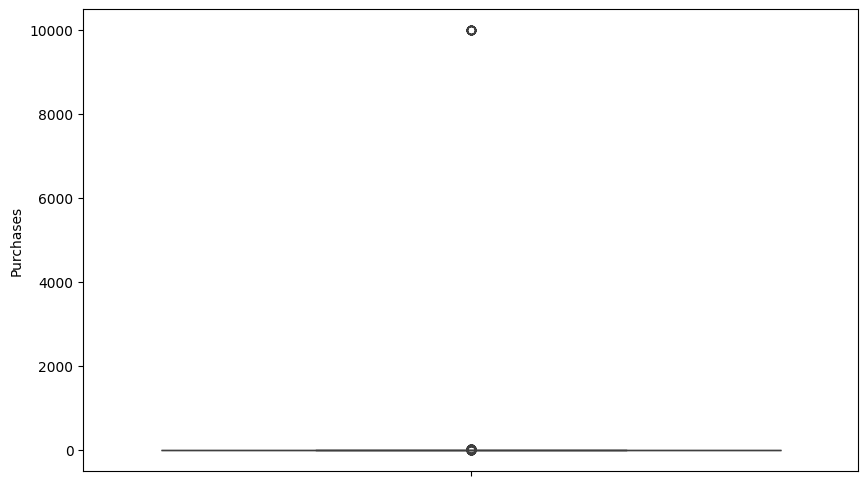

In [273]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Purchases'])
plt.show()

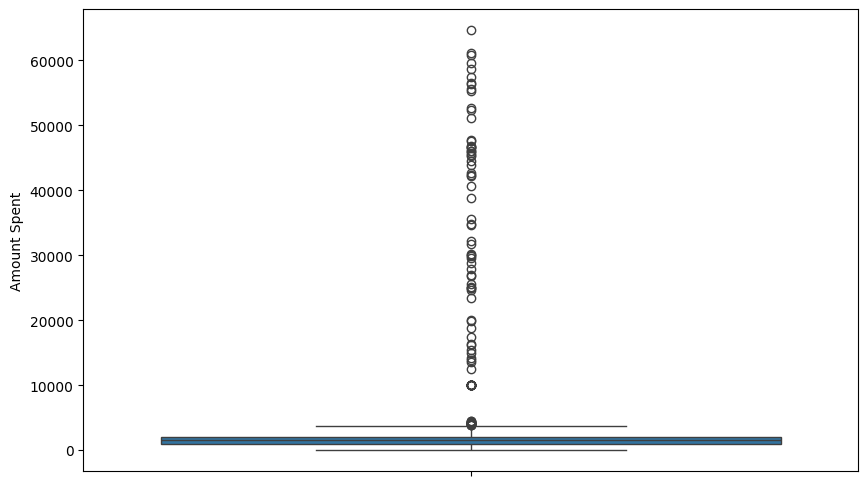

In [274]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Amount Spent'])
plt.show()

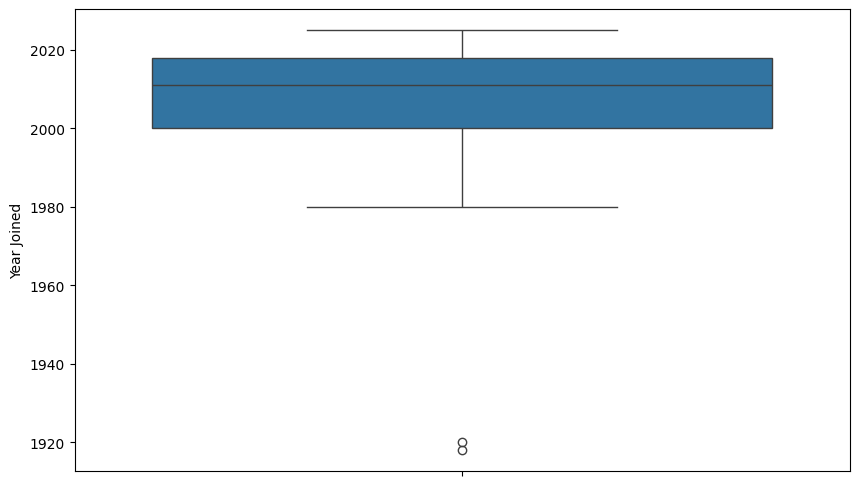

In [275]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Year Joined'])
plt.show()

# Data cleaning

## NRIC
NRIC is a unique identifier.\
There are 1506 records, however only 1501 are unique.

In [276]:
nric_dup =df[df['NRIC'].duplicated()]['NRIC']
df[df['NRIC'].isin(nric_dup)].sort_values('NRIC')

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
963,S7643927M,Kenny Lindsey,1976-09-28,1,4,2050,2001,Malaysia
991,S7643927M,Kenny Lindsey,1976-09-28,1,4,2050,2003,Malaysia
1132,S9219156K,Ricardo Marsh,1992-10-30,0,6,2910,1996,USA
1443,S9219156K,Ricardo Marsh,1992-10-30,0,6,2910,2025,USA
426,S9717736T,Levi Wolfe,1997-09-06,0,3,1410,2005,Jurong
588,S9717736T,Levi Wolfe,1997-09-06,0,3,1410,2019,Jurong
1153,S9724300C,Alexander Barnett,1997-07-31,0,5,2540,2003,USA
1266,S9724300C,Alexander Barnett,1997-07-31,0,5,2540,2015,USA
1267,S9724300C,Alexander Barnett,1997-07-31,0,5,2540,2015,USA


All values are the same with the exception of 'Year Joined'.\
The data owner has instructed to keep only the earliest record.

In [277]:
df.sort_values('Year Joined', ascending=True, inplace=True)
df.drop_duplicates(subset='NRIC', keep='first', inplace=True)
df.describe(include='all')

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
count,1501,1501,1501,1501.0,1501.000000,1501.000000,1501.000000,1501
unique,1501,1499,NaN,5.0,NaN,NaN,NaN,4
top,S7533451B,Kelly George,NaN,0.0,NaN,NaN,NaN,USA
freq,1,2,NaN,704.0,NaN,NaN,NaN,404
mean,NaN,NaN,1988-04-04 00:31:39.533644288,NaN,130.238508,3095.129913,2008.347102,NaN
min,NaN,NaN,1972-01-16 00:00:00,NaN,0.000000,0.000000,1918.000000,NaN
25%,NaN,NaN,1980-07-11 00:00:00,NaN,2.000000,980.000000,2000.000000,NaN
50%,NaN,NaN,1988-10-16 00:00:00,NaN,3.000000,1500.000000,2011.000000,NaN
75%,NaN,NaN,1995-12-23 00:00:00,NaN,4.000000,2090.000000,2018.000000,NaN
max,NaN,NaN,2005-03-15 00:00:00,NaN,9999.000000,64673.000000,2025.000000,NaN


## Cred Card User
This column should only contain 2 unique values: 1 or 0.\
However, there are 5 unique values.

In [278]:
print(df['Cred Card User'].unique())

['0' 0 1 '1' 'Yes']


In [279]:
df['Cred Card User'] =df['Cred Card User'].replace({'Yes':1, '1':1, '0':0})
df['Cred Card User'].value_counts()

/tmp/ipython-input-1801888455.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cred Card User'] =df['Cred Card User'].replace({'Yes':1, '1':1, '0':0})


,count
Cred Card User,
0,903
1,598


## 0s / null values
If the customer has made any purchases, the amount spent shouldn't be 0.\
Likewise, if 'Amount Spent' contains any values above 0, 'Purchases' shouldn't be 0.

In [280]:
df[(df['Purchases'] != 0) & (df['Amount Spent'] == 0)].sort_values(['Purchases'])

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
1133,S9535034D,Michael Myers,1995-03-02,1,6,0,1999,USA
808,S9748215P,Emmett Logan,1997-01-24,1,6,0,2005,Malaysia
146,T0498658O,Evan Chambers,2004-11-09,1,7,0,2020,Bedok
523,S9715952K,Kelly Harrington,1997-04-25,0,18,0,2014,Jurong


In [281]:
df[(df['Purchases'] == 6) & (df['Amount Spent'] != 0)]['Amount Spent'].describe()

,Amount Spent
count,67.00000
mean,3501.41791
std,4388.57330
min,450.00000
25%,2930.00000
50%,3000.00000
75%,3080.00000
max,38785.00000


There are outliers in the dataset which are affecting the mean of amount spent.\
To get a more accurate value, I must first create an outlier mask.

### Creating outlier mask


In [282]:
Q1 = df['Amount Spent'].quantile(0.25)
Q3 = df['Amount Spent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers =df[(df['Amount Spent'] < lower_bound) | (df['Amount Spent'] > upper_bound)]
masked_df =df[~df.index.isin(outliers.index)]
masked_df.describe()

,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined
count,1404,1404.000000,1404.000000,1404.000000,1404.000000
mean,1988-04-08 18:45:07.692307712,0.393875,3.049145,1495.429487,2008.475071
min,1972-01-16 00:00:00,0.000000,0.000000,0.000000,1920.000000
25%,1980-07-30 12:00:00,0.000000,2.000000,970.000000,2000.000000
50%,1988-10-02 00:00:00,0.000000,3.000000,1470.000000,2011.000000
75%,1995-12-23 12:00:00,1.000000,4.000000,2002.500000,2018.000000
max,2005-03-15 00:00:00,1.000000,18.000000,3640.000000,2025.000000
std,NaN,0.488782,1.523774,745.546521,11.957460


### Replacing 0 in 'Amount Spent' with mean

In [283]:
def get_avg_spent(i):
    results = masked_df[(masked_df['Purchases'] == i) & (masked_df['Amount Spent'] != 0)]
    avg = results['Amount Spent'].mean()
    return 0 if pd.isna(avg) else round(avg)

In [284]:
for values in [6,7,18]:
  print('Purchases:', values, ', avg_spent:', get_avg_spent(values))

Purchases: 6 , avg_spent: 2967
Purchases: 7 , avg_spent: 3330
Purchases: 18 , avg_spent: 0


In [285]:
df.loc[(df['Purchases'] == 6) & (df['Amount Spent'] == 0), 'Amount Spent'] = 2967
df.loc[(df['Purchases'] == 7) & (df['Amount Spent'] == 0), 'Amount Spent'] = 3330
df[(df['Purchases'] != 0) & (df['Amount Spent'] == 0)].sort_values(['Purchases'])

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
523,S9715952K,Kelly Harrington,1997-04-25,0,18,0,2014,Jurong


As 18 is an outlier in the 'Purchases' column, we can only populate this value with values from the full dataset.

In [286]:
print(df[(df['Purchases'] == 18) & (df['Amount Spent'] != 0)][['Amount Spent']].mean().round())

Amount Spent    30616.0
dtype: float64


In [287]:
df.loc[(df['Purchases'] == 18) & (df['Amount Spent'] == 0), 'Amount Spent'] = 30616
df[(df['Purchases'] != 0) & (df['Amount Spent'] == 0)].sort_values(['Purchases']) #This should now return blank

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region


### Replacing 0 in 'Purchases' with nearest neighbors

In [288]:
df[(df['Purchases'] == 0) & (df['Amount Spent'] != 0)].sort_values(['Amount Spent'])

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
413,T0193823M,Jorge Murray,2001-05-29,0,0,1253,2008,Jurong
547,T0037140L,Jaime Mclaughlin,2000-12-04,0,0,4451,2019,Jurong
170,S7825207W,Jacquelyn Vega,1978-01-04,0,0,12500,1997,Bedok
95,T0242544C,Fannie Webb,2002-08-06,0,0,25023,2013,Bedok


In [289]:
def get_avg_pur(i):
    results = masked_df[(masked_df['Purchases'] != 0) & (masked_df['Amount Spent'] == i)]
    avg = results['Purchases'].mean()
    return 0 if pd.isna(avg) else round(avg)

In [290]:
for values in [1253,4451,12500,25023]:
  print('Amount Spent:', values, ', avg_pur:', get_avg_pur(values))

Amount Spent: 1253 , avg_pur: 0
Amount Spent: 4451 , avg_pur: 0
Amount Spent: 12500 , avg_pur: 0
Amount Spent: 25023 , avg_pur: 0


As I suspected, 'Amount Spent' is too specific to yield a range of 'Purchases' values.\
We can only infer the value based on the next closest values.

In [291]:
def get_closest_values(i):
    results = df.loc[df['Amount Spent'] != i].copy()
    results['abs_diff'] = (results['Amount Spent'] - i).abs()
    range = results.sort_values('abs_diff').head()['Purchases']
    return range.value_counts().sort_index()

In [292]:
for values in [1253,4451,12500,25023]:
  print(f'Amount Spent:{values}\n{get_closest_values(values)}')

Amount Spent:1253
Purchases
2    1
3    4
Name: count, dtype: int64
Amount Spent:4451
Purchases
8    3
9    2
Name: count, dtype: int64
Amount Spent:12500
Purchases
9       1
10      1
22      1
26      1
9999    1
Name: count, dtype: int64
Amount Spent:25023
Purchases
18    1
19    1
27    2
28    1
Name: count, dtype: int64


It is possible to use the KNN imputer from the scikit learn library for this task. However, the KNN imputer doesn't show us the absolute differences between the next nearest neighbor, furthermore, if we set n_neighbor to more than 1, it imputes the value using the mean.

In this scenario, it is better to use the mode.

Based on the results, it seems logical that:
* 3 purchases will yield 1253 in amount spent.
* 8 purchases will yield 4551 in amount spent.

However, the purchases values for 12500 and 25023 fluctuates.

In [293]:
df.loc[(df['Purchases'] == 0) & (df['Amount Spent'] == 1253), 'Purchases'] = 3
df.loc[(df['Purchases'] == 0) & (df['Amount Spent'] == 4451), 'Purchases'] = 8

In [294]:
results = df.loc[df['Amount Spent'] != 25023].copy()
results['abs_diff'] = (results['Amount Spent'] - 25023).abs()
results[['Purchases', 'Amount Spent', 'abs_diff']].sort_values('abs_diff').head()

,Purchases,Amount Spent,abs_diff
1141,19,24972,51
920,27,25125,102
1475,28,24637,386
824,27,25585,562
751,18,23481,1542


For Purchases where Amount Spent is 25023, the purchases values seem to fall within a certain range (18-28).\
It may be possible to use the mean of the 2 closest values as the absolute difference in amount spent is only about 100.

In [295]:
print(results.sort_values('abs_diff').head(2)['Purchases'].mean().round())

23.0


In [296]:
df.loc[(df['Purchases'] == 0) & (df['Amount Spent'] == 25023), 'Purchases'] = 23

In [297]:
results = df[(df['Amount Spent'] != 12500) & (df['Purchases'] != 9999)].copy()
results['abs_diff'] = (results['Amount Spent'] - 12500).abs()
results[['Purchases', 'Amount Spent', 'abs_diff']].sort_values('abs_diff').head()

,Purchases,Amount Spent,abs_diff
1496,9,13618,1118
1372,22,13896,1396
1072,26,14142,1642
1455,10,14965,2465
214,5,15472,2972


This would not work for where Amount Spent is 12500 as the range of values in 'Purchases' fluctuates significantly (5-26).
Futhermore, the absolute differences in amount spent between the next closest values are all more than 1000.\
Because of this, we are unable to get an accurate 'supposed value'.\
\
A simple solution would be to replace the amount spent with 0 instead.

In [298]:
df.loc[(df['Purchases'] == 0) & (df['Amount Spent'] == 12500), 'Amount Spent'] = 0
df[(df['Purchases'] == 0) & (df['Amount Spent'] != 0)].sort_values(['Amount Spent']) #This should now be blank

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region


## Outliers / Extreme values
1. Purchases
2. Amount Spent
3. Year Joined

In [299]:
df.describe()

,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined
count,1501,1501.000000,1501.000000,1501.000000,1501.000000
mean,1988-04-04 00:31:39.533644288,0.398401,130.261159,3113.371086,2008.347102
min,1972-01-16 00:00:00,0.000000,0.000000,0.000000,1918.000000
25%,1980-07-11 00:00:00,0.000000,2.000000,980.000000,2000.000000
50%,1988-10-16 00:00:00,0.000000,3.000000,1500.000000,2011.000000
75%,1995-12-23 00:00:00,1.000000,4.000000,2090.000000,2018.000000
max,2005-03-15 00:00:00,1.000000,9999.000000,64673.000000,2025.000000
std,NaN,0.489732,1117.793376,7763.083335,12.187539


### Purchases
The max purchase is 9999 while the 75% quartile is only 4.
This column is likely to contain errors.

In [300]:
print(np.sort(df['Purchases'].unique()))

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   17   18   19   21   22   23   24   25   26   27   28   29
   30 9999]


In [301]:
df[df['Purchases']==9999]

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
1138,S7894382V,Bruce Mcdaniel,1978-08-01,1,9999,9999,1983,USA
1111,S8487511L,Melody Castillo,1984-05-26,1,9999,9999,1986,USA
1147,S8130293F,Aaron Baker,1981-06-14,0,9999,9999,1987,USA
850,S7536969F,Catherine Griffin,1975-10-12,0,9999,9999,1989,Malaysia
754,S9168981H,Colleen Reeves,1991-09-16,1,9999,9999,1991,Malaysia
900,S7550976X,Desiree Phelps,1975-02-11,0,9999,9999,1995,Malaysia
101,S8870248H,Lorena Doyle,1988-10-08,1,9999,9999,2000,Bedok
768,S9855552R,Raquel Shelton,1998-09-22,1,9999,9999,2000,Malaysia
118,S8767776D,Terence Larson,1987-09-05,1,9999,9999,2001,Bedok
1122,S9984298Z,Joshua Love,1999-12-19,0,9999,9999,2002,USA


In [302]:
df[(df['Purchases'] != 9999) & (df['Amount Spent'] == 9999)]

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region


There are no other entries where 'Purchases' is not 9999 and 'Amount Spent' is 9999. This is likely an input error in both column.\
\
If there were other figures in 'Amount Spent' where 'Purchases' == 9999, we could populate the 'Purchases' column with the mean 'supposed value'
\
We could make an inferred guess on the 'supposed' Purchases value based on the next closest values in 'Amount Spent'.\
\
However, in doing so, it may skew the data.

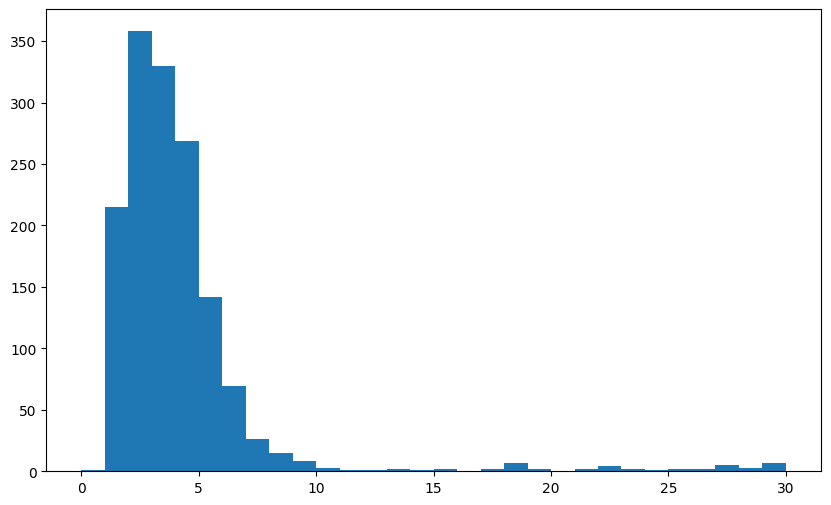

In [303]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['Purchases'] != 9999]['Purchases'], bins=30)
plt.show()

In [304]:
results = df[(df['Amount Spent'] != 9999)].copy()
results['abs_diff'] = (results['Amount Spent'] - 9999).abs()
results[['Purchases', 'Amount Spent', 'abs_diff']].sort_values('abs_diff').head()

,Purchases,Amount Spent,abs_diff
1496,9,13618,3619
1372,22,13896,3897
1072,26,14142,4143
1455,10,14965,4966
214,5,15472,5473


In [305]:
print(results[['Purchases', 'Amount Spent', 'abs_diff']].sort_values('abs_diff').head()['Purchases'].mean().round())

14.0


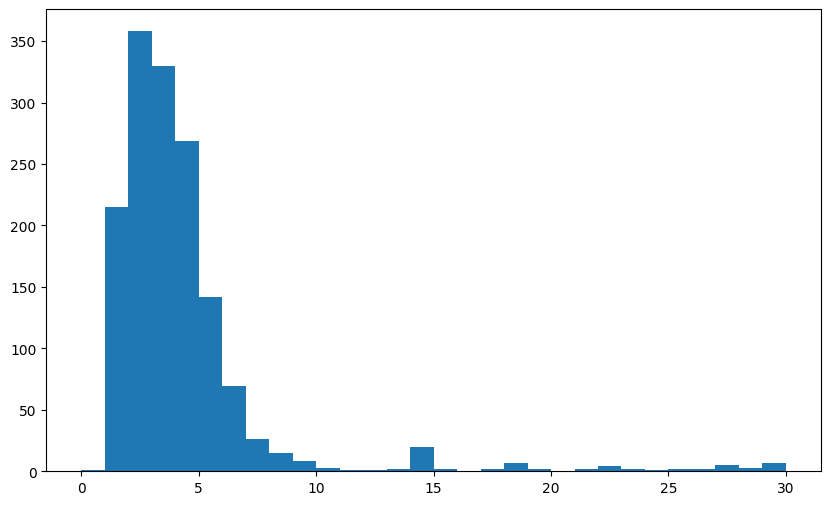

In [306]:
df5 = df.copy()
df5.loc[(df5['Purchases'] == 9999) & (df5['Amount Spent'] == 9999), 'Purchases'] = 14

plt.figure(figsize=(10, 6))
plt.hist(df5['Purchases'], bins=30)
plt.show()

Upon investigation, the next closest values to 'Amount Spent' of 9999 have an absolute difference of more than 3600. Furthermore, the 'Purchases' values in this range fluctuate by a significant amount (5-26).\
\
We could try to replace the value with the mean (14).
\
But as seen from the visualisation above, it adds 19 new data points to where purchases == 14 and creates an unrealistic distribution.\
\
Furthermore, any analysis will not yield any meaningful results as any calculations on 'Amount Spent' where 'Purchases == 14' will always return an aggregate of '9999'.\
Therefore I will choose to replace these values with 0 instead.

In [307]:
df.loc[df['Purchases'] == 9999, 'Purchases'] = 0
df.loc[df['Amount Spent'] == 9999, 'Amount Spent'] = 0
df.describe()

,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined
count,1501,1501.000000,1501.000000,1501.000000,1501.000000
mean,1988-04-04 00:31:39.533644288,0.398401,3.691539,2986.801466,2008.347102
min,1972-01-16 00:00:00,0.000000,0.000000,0.000000,1918.000000
25%,1980-07-11 00:00:00,0.000000,2.000000,970.000000,2000.000000
50%,1988-10-16 00:00:00,0.000000,3.000000,1490.000000,2011.000000
75%,1995-12-23 00:00:00,1.000000,4.000000,2070.000000,2018.000000
max,2005-03-15 00:00:00,1.000000,30.000000,64673.000000,2025.000000
std,NaN,0.489732,3.785603,7731.213409,12.187539


### Amount Spent
The value for max 'Amount Spent' (64673) is much higher than the 75% quantile (2070).

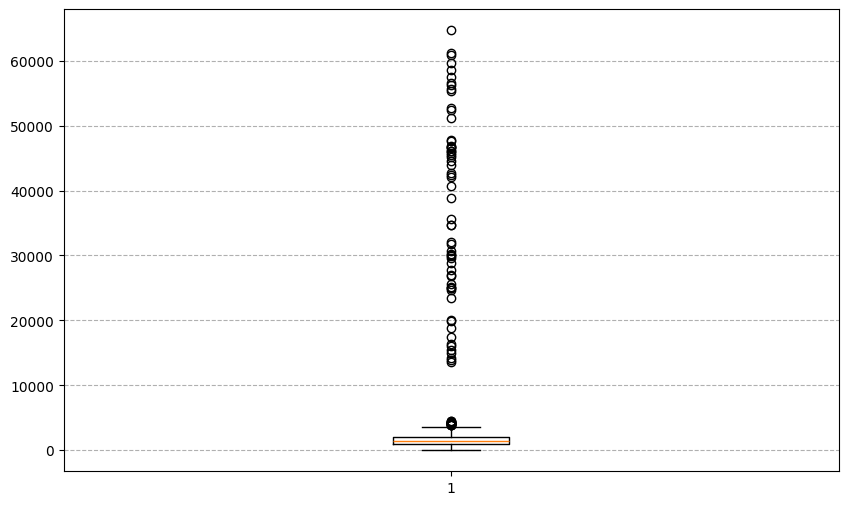

In [308]:
plt.figure(figsize=(10,6))
plt.boxplot(df['Amount Spent'])
plt.grid(True, axis='y', linestyle='--')
plt.show()

In [309]:
Q1 = df['Amount Spent'].quantile(0.25)
Q3 = df['Amount Spent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers =df[(df['Amount Spent'] < lower_bound) | (df['Amount Spent'] > upper_bound)]
masked_df =df[~df.index.isin(outliers.index)]
print(len(df)-len(masked_df))
print(round(100-(len(masked_df)/len(df)*100),1),'%')

78
5.2 %


There are 78 outliers (5.2% of the dataset) that fall outside of the inter quartile range.\
Even though these data points are outliers, they may contain information on customer spending patterns.\
They also appear to be bucketable based on the visualisation (10000-20000, 22000-35000, 38000-50000 and 50000-65000).\
\
With further feature engineering, 'Amount Spent' could be converted to categorical data through binning and may be useful for modelling.\
Therefore I will not remove these data points.

### Year Joined
The minimum year joined is 1918, while the minimum birth year is 1972.

In [310]:
np.sort(df['Year Joined'].unique())

array([1918, 1920, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025])

In [311]:
df[df['Year Joined'].isin([1918,1920])]

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region
751,S9880670H,Marie Cox,1998-05-25,0,18,23481,1918,Malaysia
752,S9844148D,Wilfred Mack,1998-05-15,0,1,530,1920,Malaysia


It is impossible for these members to join before they were even born. This is clearly an error.\
The best thing I can do here is find the average age joined and update the 'Year Joined' accordingly.

In [312]:
df['age_joined']=df['Year Joined']-df['Birthdate'].dt.year
df[~df['Year Joined'].isin([1918,1920])][['age_joined']].mean().round()

,0
age_joined,21.0


In [313]:
df.loc[df['Year Joined'].isin([1918, 1920]), 'Year Joined'] = df.loc[
    df['Year Joined'].isin([1918, 1920]), 'Birthdate'].dt.year + 21

In [314]:
df['age_joined']=df['Year Joined']-df['Birthdate'].dt.year
df.describe()

,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,age_joined
count,1501,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,1988-04-04 00:31:39.533644288,0.398401,3.691539,2986.801466,2008.480346,20.723518
min,1972-01-16 00:00:00,0.000000,0.000000,0.000000,1980.000000,0.000000
25%,1980-07-11 00:00:00,0.000000,2.000000,970.000000,2000.000000,11.000000
50%,1988-10-16 00:00:00,0.000000,3.000000,1490.000000,2011.000000,20.000000
75%,1995-12-23 00:00:00,1.000000,4.000000,2070.000000,2018.000000,28.000000
max,2005-03-15 00:00:00,1.000000,30.000000,64673.000000,2025.000000,53.000000
std,NaN,0.489732,3.785603,7731.213409,11.748381,11.627561


# Data Anonymisation
1. Hashing NRIC & names
2. Generalizing birthdates

## Hashing NRIC & names

In [315]:
import hashlib

def hash(val):
    return hashlib.sha256(val.encode()).hexdigest()[:8].strip()

df['Hashed_NRIC'] = df['NRIC'].apply(hash)
df['Hashed_Name'] = df['Member_Name'].apply(hash)
df[['Hashed_NRIC','Hashed_Name']].describe() #checking to see if all hashed values are unique

,Hashed_NRIC,Hashed_Name
count,1501,1501
unique,1501,1499
top,6a4c354e,67710ad5
freq,1,2


In [316]:
df[df['Hashed_Name']== '67710ad5']

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Region,age_joined,Hashed_NRIC,Hashed_Name
834,S7235936V,Kelly George,1972-01-16,0,3,1360,1984,Malaysia,12,543d951f,67710ad5
1262,S9270874I,Kelly George,1992-05-05,1,2,1010,2010,USA,18,ca592654,67710ad5


All hashed values are unique except for Kelly George, however this will not be a problem as the name look up will return the same values.

## Generalizing birthdate

In [317]:
df['Birth Year'] = df['Birthdate'].dt.year
df.drop(['Birthdate'], axis=1, inplace=True)
df.head()

,NRIC,Member_Name,Cred Card User,Purchases,Amount Spent,Year Joined,Region,age_joined,Hashed_NRIC,Hashed_Name,Birth Year
751,S9880670H,Marie Cox,0,18,23481,2019,Malaysia,21,e3c4a361,35854115,1998
752,S9844148D,Wilfred Mack,0,1,530,2019,Malaysia,21,78f599b8,2e63e32b,1998
1136,S7527818A,Gerard Sims,0,1,540,1980,USA,5,f185a8d7,70fc2b81,1975
53,S7215504L,Carole Briggs,1,3,1400,1980,Bedok,8,5e61c9d4,8a9058d5,1972
799,S7282385H,Damon Moss,0,4,2000,1980,Malaysia,8,8f76aa6e,6dd7e8f3,1972


# Exporting cleaned dataset and dictionary

In [318]:
lookup=df[['Hashed_NRIC','NRIC', 'Hashed_Name', 'Member_Name']]
df=df[['Hashed_NRIC', 'Hashed_Name', 'Birth Year', 'Cred Card User', 'Purchases',
       'Amount Spent', 'Year Joined', 'Region']].sort_values('Region')

In [319]:
df.to_csv('cleaned_data.csv', index=False)
lookup.to_csv('lookup.csv', index=False)